In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Generating Random Dataset

In [135]:
X = np.vstack([(np.random.randn(10, 2)*4),(np.random.randn(10, 2)*10)])
Y = np.hstack([[0]*10,[1]*10])
dataset = pd.DataFrame(X, columns=['X1','X2'])
dataset["Y"] = Y

# Random Data set generated

In [136]:
dataset

,X1,X2,Y
0,6.292402,0.579438,0
1,-6.672338,-1.802703,0
2,1.117052,0.912656,0
3,-2.975333,3.216338,0
4,-5.160546,1.023684,0
5,5.022229,-1.216628,0
6,2.310838,-2.249163,0
7,2.953226,8.102320,0
8,-0.963609,2.458517,0
9,-0.952308,-1.201335,0


### Generating plot

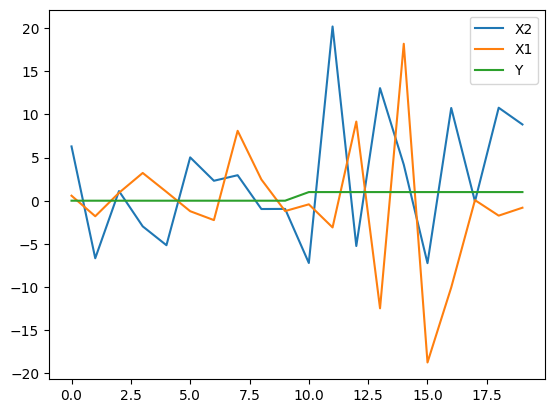

In [137]:
plt.plot(dataset, label='Inline label')
plt.legend(["X2", "X1", "Y"])

### Generating target variable to vector of number of classes 

In [138]:
Z = np.zeros((20, 2))
for i in range(20):
    Z[i, Y[i]] = 1

In [139]:
X.shape

(20, 2)

### Initiating Random Weights and Biases

In [140]:
Wi_1 = np.random.randn(3, 2)
Bi_1 = np.random.randn(3)
Wi_2 = np.random.randn(3, 2)
Bi_2 = np.random.randn(2)

In [141]:
Wi_1, Bi_1, Wi_2, Bi_2

(array([[ 0.65878792, -0.45507762],
        [-1.20921576, -0.52365558],
        [ 1.61509733, -1.221178  ]]),
 array([-0.7517202 , -0.11306224,  0.29697868]),
 array([[ 0.76986086, -1.2748735 ],
        [ 0.71079906,  0.44578737],
        [-0.19651517,  0.33806091]]),
 array([ 1.80633359, -0.83099703]))

In [142]:
Wi_1.T

array([[ 0.65878792, -1.20921576,  1.61509733],
       [-0.45507762, -0.52365558, -1.221178  ]])

In [143]:
X

array([[  6.29240195,   0.57943845],
       [ -6.67233818,  -1.80270344],
       [  1.11705159,   0.91265624],
       [ -2.975333  ,   3.21633811],
       [ -5.16054641,   1.02368408],
       [  5.02222876,  -1.2166281 ],
       [  2.31083804,  -2.24916338],
       [  2.9532263 ,   8.10231965],
       [ -0.9636093 ,   2.45851674],
       [ -0.9523078 ,  -1.20133477],
       [ -7.22158509,  -0.42069614],
       [ 20.19699169,  -3.09995064],
       [ -5.25295599,   9.17724664],
       [ 13.04947167, -12.47540063],
       [  4.18219125,  18.19437892],
       [ -7.24093626, -18.75434865],
       [ 10.74942118, -10.05764062],
       [ -0.08344239,   0.06809642],
       [ 10.77749184,  -1.73192258],
       [  8.83849059,  -0.81362755]])

In [144]:
X.shape

(20, 2)

In [145]:
X.dot(Wi_1.T)

array([[  3.88166891,  -7.91229779,   9.45524411],
       [ -3.57528579,   9.01229219,  -8.57505381],
       [  0.32057067,  -1.82867392,   0.68963133],
       [ -3.42379691,   1.91356615,  -8.73317371],
       [ -3.86556133,   5.70415616,  -9.58488521],
       [  3.86224384,  -5.43586406,   9.59710772],
       [  2.54589609,  -1.61651482,   6.47885718],
       [ -1.74163451,  -7.81391269,  -5.12462654],
       [ -1.7536301 ,  -0.12220445,  -4.55860935],
       [ -0.08066831,   1.78063126,  -0.07102621],
       [ -4.5660436 ,   8.95275438, -11.14981793],
       [ 14.71625224, -22.79921419,  36.40569888],
       [ -7.63694346,   1.54624074, -19.69108686],
       [ 14.27410985,  -9.24681362,  36.3108516 ],
       [ -5.52467753, -14.58475965, -15.46392924],
       [  3.76444296,  18.5766736 ,  11.20758106],
       [ 11.65859591,  -7.73162985,  29.64353086],
       [ -0.08595999,   0.06524079,  -0.21792543],
       [  7.88824061, -12.12538205,  19.52168406],
       [  6.1929545 , -10.26158

### Defining the Forward Propogation function

In [146]:
def forward_prop(X, Wi_1, Bi_1, Wi_2, Bi_2):
    # First layer
    M = 1/(1+np.exp(-(X.dot(Wi_1.T) + Bi_1)))
    # Second layer
    A = M.dot(Wi_2) + Bi_2
    # Softmax
    expA = np.exp(A)
    Y = expA/expA.sum(axis=1, keepdims=True)
    return Y, M

In [147]:
forward_prop(X, Wi_1, Bi_1, Wi_2, Bi_2)

(array([[0.98307603, 0.01692397],
        [0.94925302, 0.05074698],
        [0.95633268, 0.04366732],
        [0.94762834, 0.05237166],
        [0.94888993, 0.05111007],
        [0.98306485, 0.01693515],
        [0.9800919 , 0.0199081 ],
        [0.94209191, 0.05790809],
        [0.94790736, 0.05209264],
        [0.96018017, 0.03981983],
        [0.94844973, 0.05155027],
        [0.9844418 , 0.0155582 ],
        [0.94540984, 0.05459016],
        [0.98444214, 0.01555786],
        [0.93346453, 0.06653547],
        [0.98683188, 0.01316812],
        [0.98444285, 0.01555715],
        [0.95715512, 0.04284488],
        [0.98441694, 0.01558306],
        [0.98430623, 0.01569377]]),
 array([[9.58111334e-01, 3.26955320e-04, 9.99941838e-01],
        [1.30348783e-02, 9.99863525e-01, 2.53961182e-04],
        [3.93851867e-01, 1.25457245e-01, 7.28417815e-01],
        [1.51346650e-02, 8.58210265e-01, 2.16826756e-04],
        [9.78296507e-03, 9.96282924e-01, 9.25280180e-05],
        [9.57324754e-01, 3.8

## Back Propogation by Differentiating or Gradient Descent

In [148]:
# returns gradient for weights_2
def diff_Wi_2(H, Z, Y):
    return H.T.dot(Z-Y)

In [149]:
# returns gradient for weights_1
def diff_Wi_1(X, H, Z, output, Wi_2):
    dZ = (Z-output).dot(Wi_2.T) * H * (1-H)
    return X.T.dot(dZ)

In [150]:
# returns derivative for both biases
def diff_Bi2(Z, Y):
    return (Z-Y).sum(axis=0)

def diff_Bi1(Z, Y, Wi_2, H):
    return ((Z-Y).dot(Wi_2.T) * H * (1-H)).sum(axis=0)

In [151]:
learning_rate = 1e-3
for epoch in range(200000):
    output, hidden = forward_prop(X, Wi_1, Bi_1, Wi_2, Bi_2)
    Wi_2 += learning_rate * diff_Wi_2(hidden, Z, output)
    Bi_2 += learning_rate * diff_Bi2(Z, output)
    Wi_1 += learning_rate * diff_Wi_1(X, hidden, Z, output, Wi_2).T
    Bi_1 += learning_rate * diff_Bi1(Z, output, Wi_2, hidden)

### Generating predectition at new datapoint

In [159]:
X_test = np.array([8,5])

hidden_output = 1/(1+np.exp(-(X_test.dot(Wi_1.T) + Bi_1)))
Outer_layer_output = hidden_output.dot(Wi_2) + Bi_2
expA = np.exp(Outer_layer_output)
Y = expA/expA.sum()
print(" porb of class 0 >>>>>>>>>>>>> {} \n prob of class 1 >>>>>>>>>>>>> {} ".format(Y[0], Y[1]))

 porb of class 0 >>>>>>>>>>>>> 0.9862203563836331 
 prob of class 1 >>>>>>>>>>>>> 0.013779643616366855 
